<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/8_profit_margin_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8. 제품별 이익 마진 분석

* **이익마진 = 판매가격 – 구매가격**
* 이익 마진이 높은 제품과 낮은 제품을 식별


#### 회사 전략
* **수익성 높은 제품에 대한 집중**: 이익 마진이 높은 제품에 대해 추가적인 마케팅 활동을 집중하거나, 생산량을 늘리는 등의 전략을 고려할 수 있음. 이는 전체 수익성을 높이는 데 중요한 역할을 할 수 있음.

* **가격 전략 재검토**: 이익 마진이 낮은 제품에 대해서는 가격 전략을 재검토할 필요가 있음. 가격 인상이 가능한지, 또는 원가 절감을 통해 수익성을 개선할 수 있는지 등을 평가해야 함.
* **제품 개선 및 혁신**: 일부 제품의 이익 마진이 낮은 경우, 제품 개선이나 혁신을 통해 가치를 높이고, 이에 따라 가격을 조정할 수 있는 기회를 모색해야 함.

* **재고 관리 최적화**: 이익 마진이 높은 제품에 대해서는 재고 부족이 발생하지 않도록 관리하는 것이 중요. 반면, 이익 마진이 낮은 제품에 대해서는 과잉 재고가 발생하지 않도록 주의해야 함.


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 커서 연결
cursor = conn.cursor()

# 제품별 이익 마진 분석 SQL 쿼리 실행
query ="""
SELECT p.productName, p.buyPrice,
		avg(od.priceEach) AS averageSalePrice,
		(avg(od.priceEach)- p.buyPrice) AS profitMargin
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY profitMargin DESC
;
"""

# 데이터프레임 생성 > cursor 이용
cursor.execute(query)

columns = [desc[0] for desc in cursor.description]
profit_margin_df = pd.DataFrame(cursor.fetchall(), columns=columns)

# 연결 종료
# cursor.close()
# conn.close()


In [ ]:
cursor.description

[('productName', 253, None, None, None, None, 0, 4097, 255),
 ('buyPrice', 246, None, None, None, None, 0, 36865, 63),
 ('averageSalePrice', 246, None, None, None, None, 1, 32768, 63),
 ('profitMargin', 246, None, None, None, None, 1, 32896, 63)]

In [ ]:
columns

['productName', 'buyPrice', 'averageSalePrice', 'profitMargin']

In [ ]:
profit_margin_df

,productName,buyPrice,averageSalePrice,profitMargin
0,1952 Alpine Renault 1300,98.58,197.309286,98.729286
1,2001 Ferrari Enzo,95.59,187.096667,91.506667
2,2003 Harley-Davidson Eagle Drag Bike,91.02,172.288214,81.268214
3,1928 Mercedes-Benz SSK,72.56,149.887500,77.327500
4,1968 Ford Mustang,95.34,172.446296,77.106296
...,...,...,...,...
104,1982 Ducati 900 Monster,47.10,61.358889,14.258889
105,1982 Ducati 996 R,24.14,36.594074,12.454074
106,1930 Buick Marquette Phaeton,27.06,38.791071,11.731071
107,Boeing X-32A JSF,32.77,44.427143,11.657143


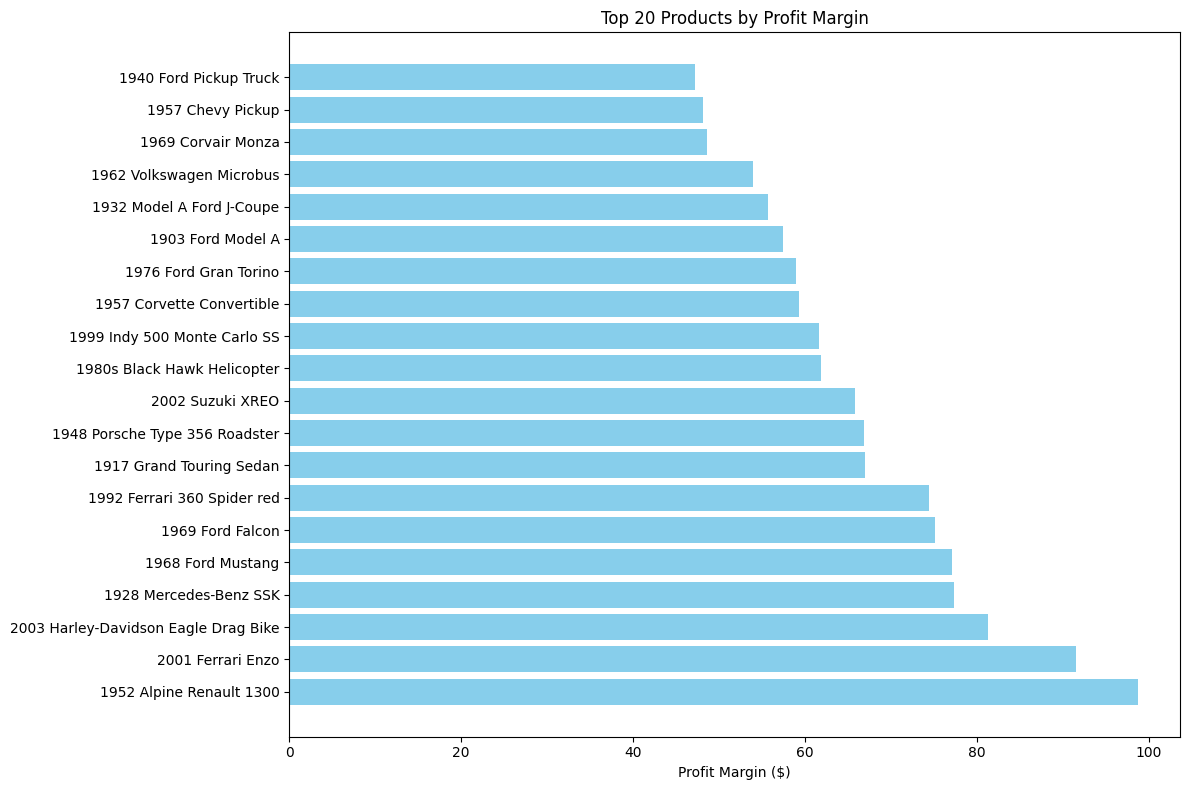

In [ ]:
# 이익 마진 시각화
plt.figure(figsize=(12, 8))

# 상위 20개 제품만 시각화
top_20_products = profit_margin_df.head(20)
plt.barh(top_20_products['productName'], top_20_products['profitMargin'], color='skyblue')
plt.xlabel('Profit Margin ($)')
plt.title('Top 20 Products by Profit Margin')
plt.tight_layout()
plt.show()

#### 인사이트 도출
* 1940 Ford Truck은 이익 마진 최하위
* 1952 Apline은 이익 마진 최상위

#### 제품 + 카테고리 별 이익 마진 분석

In [ ]:
# 이익 마진 및 productLine 포함한 SQL 쿼리 실행
query ="""
SELECT p.productName, p.productLine, p.buyPrice,
		avg(od.priceEach) AS averageSalePrice,
		(avg(od.priceEach)- p.buyPrice) AS profitMargin
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
GROUP BY p.productCode
ORDER BY profitMargin DESC
LIMIT 20
;
"""

# 데이터프레임 생성 > cursor 이용
cursor.execute(query)

columns = [desc[0] for desc in cursor.description]
profit_margin_df = pd.DataFrame(cursor.fetchall(), columns=columns)

# 연결 종료
# cursor.close()
# conn.close()

In [ ]:
profit_margin_df

,productName,productLine,buyPrice,averageSalePrice,profitMargin
0,1952 Alpine Renault 1300,Classic Cars,98.58,197.309286,98.729286
1,2001 Ferrari Enzo,Classic Cars,95.59,187.096667,91.506667
2,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,91.02,172.288214,81.268214
3,1928 Mercedes-Benz SSK,Vintage Cars,72.56,149.887500,77.327500
4,1968 Ford Mustang,Classic Cars,95.34,172.446296,77.106296
5,1969 Ford Falcon,Classic Cars,83.05,158.218889,75.168889
6,1992 Ferrari 360 Spider red,Classic Cars,77.90,152.342830,74.442830
7,1917 Grand Touring Sedan,Vintage Cars,86.70,153.680000,66.980000
8,1948 Porsche Type 356 Roadster,Classic Cars,62.16,129.073600,66.913600
9,2002 Suzuki XREO,Motorcycles,66.27,132.168929,65.898929


In [ ]:
print(profit_margin_df.columns)

Index(['productName', 'productLine', 'buyPrice', 'averageSalePrice',
       'profitMargin'],
      dtype='object')


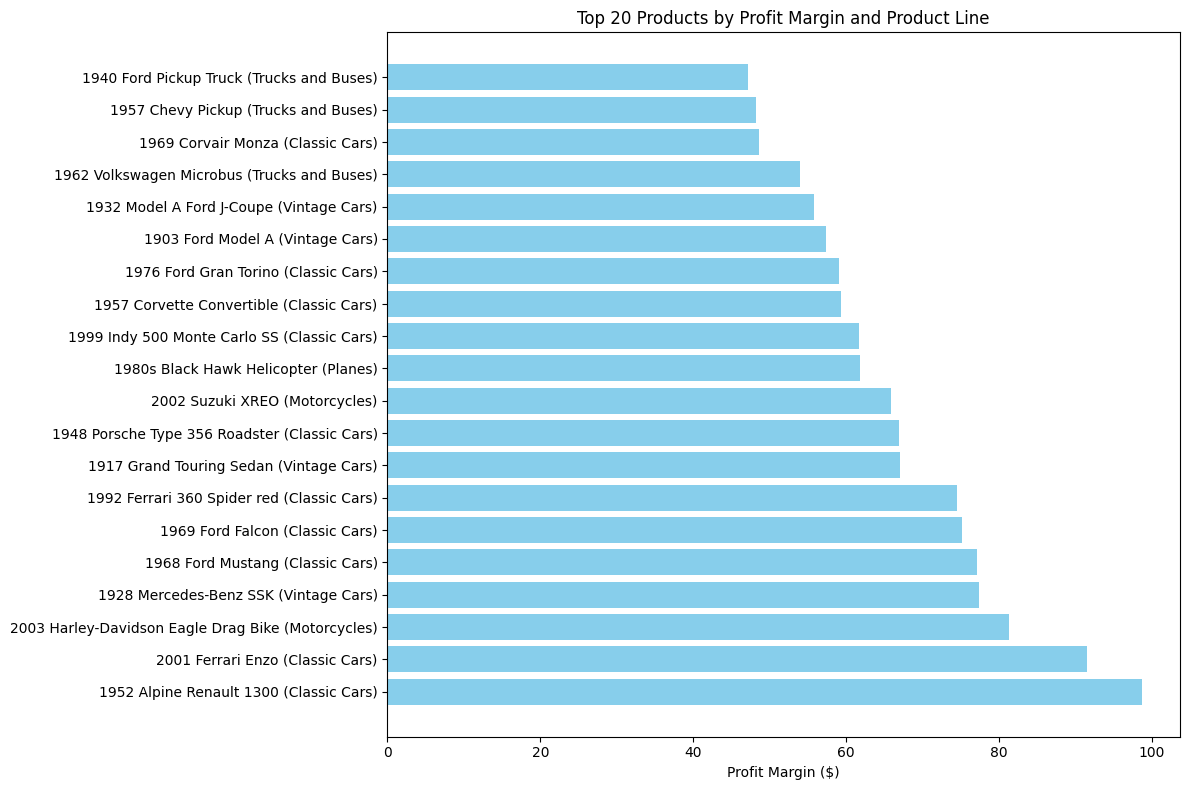

In [ ]:
# 이익 마진 및 productLine 시각화
plt.figure(figsize=(12, 8))

# 상위 20개 제품 시각화
# 제품 이름과 productLine을 결합하여 y축 레이블 생성
y_labels = [f"{row['productName']} ({row['productLine']})" for index, row in profit_margin_df.iterrows()]

plt.barh(y_labels, profit_margin_df['profitMargin'], color='skyblue')
plt.xlabel('Profit Margin ($)')
plt.title('Top 20 Products by Profit Margin and Product Line')
plt.tight_layout()
plt.show()

#### 인사이트 도출
Profit margin이 좋은 제품들은 **Classic car**가 많다